In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
 # Amount of pages with Mirka's review in time of writing this script
num_pages = 44

# List to save each rating
ratings = []

# Iterate though all pages and take all Mirka's ratings
for i in range(1,num_pages+1):
    r = requests.get("https://kultura.zpravy.idnes.cz/recenze-mirky-spacilove.aspx?strana={}".format(i))
    soup = BeautifulSoup(r.text, "html.parser")
    spans = soup.find_all(class_="rating")
    ratings.extend([int(span.get_text().split(" ")[0]) for span in spans])
    r.close()

mirkine_hodnotenia = pd.Series(ratings)

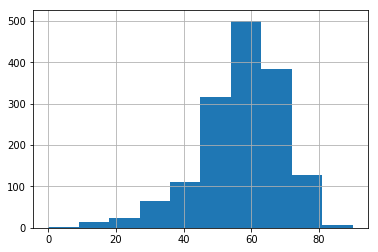

In [6]:
# Histogram to prove that 60% is her favorite number
mirkine_hodnotenia.hist()
plt.show()

In [5]:
# Descriptive statistics of her ratings
mirkine_hodnotenia.describe()

count    1551.000000
mean       57.053514
std        13.196641
min         0.000000
25%        50.000000
50%        60.000000
75%        65.000000
max        90.000000
dtype: float64